In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_classification # download a dataset 
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
hot100songsfeatures=pd.read_csv('data/hot100songsfeatures.csv')
hot100songsfeatures.head()
pd.set_option('display.max_columns', None)
hot100songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4


In [4]:
#hot100songsfeatures.info()

1 - add column to identified the list

In [5]:
hot100songsfeatures['identifier']="hot100"
hot100songsfeatures['identifier']
hot100songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100


In [6]:
not_so_hot_songsfeatures=pd.read_csv('data/not_so_hot_songsfeatures.csv')
not_so_hot_songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Crywank,Only Everyone Can Judge Me,0zgTmQKlcGxZxHo3ObjnQx,0.721,0.460,10,-11.885,0,0.2830,0.087200,0.000379,0.0959,0.576,89.979,audio_features,0IHBwwlqEOtj4qukhAoMTC,spotify:track:0IHBwwlqEOtj4qukhAoMTC,https://api.spotify.com/v1/tracks/0IHBwwlqEOtj...,https://api.spotify.com/v1/audio-analysis/0IHB...,170361,4
1,1,Jazmine Sullivan,In Love With Another Man,1xu91y5jf13yxAssdfsbPt,0.395,0.123,10,-16.099,0,0.0329,0.958000,0.952000,0.1240,0.156,73.959,audio_features,3KJeOdlwj5W0c9XIrjqzY0,spotify:track:3KJeOdlwj5W0c9XIrjqzY0,https://api.spotify.com/v1/tracks/3KJeOdlwj5W0...,https://api.spotify.com/v1/audio-analysis/3KJe...,387667,4
2,2,Rival Sons,Back In The Woods,4r9ZPOyVV5abeHjOsuFsaW,0.361,0.977,1,-5.452,0,0.1080,0.000104,0.249000,0.3190,0.269,114.944,audio_features,5C5LhGFGrHmdHjDtvdjTYa,spotify:track:5C5LhGFGrHmdHjDtvdjTYa,https://api.spotify.com/v1/tracks/5C5LhGFGrHmd...,https://api.spotify.com/v1/audio-analysis/5C5L...,167286,4
3,3,TRESOR,Aphrodite,60q1qCrbsMcz1Dj0mBTjhH,0.811,0.324,0,-14.555,1,0.1230,0.003540,0.002000,0.0544,0.886,142.422,audio_features,4EgVhvG6zB6uSckhHKprBM,spotify:track:4EgVhvG6zB6uSckhHKprBM,https://api.spotify.com/v1/tracks/4EgVhvG6zB6u...,https://api.spotify.com/v1/audio-analysis/4EgV...,216120,4
4,4,Planetshakers,Like A Fire,5HOgqiUikXWGzHDw2tbGRR,0.573,0.759,0,-4.646,1,0.0271,0.005750,0.000000,0.1200,0.234,107.977,audio_features,0lDg8siIkafxYPlf0um4HV,spotify:track:0lDg8siIkafxYPlf0um4HV,https://api.spotify.com/v1/tracks/0lDg8siIkafx...,https://api.spotify.com/v1/audio-analysis/0lDg...,236293,4


In [7]:
not_so_hot_songsfeatures['identifier']="not_hot"
not_so_hot_songsfeatures['identifier']
not_so_hot_songsfeatures.head()

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Crywank,Only Everyone Can Judge Me,0zgTmQKlcGxZxHo3ObjnQx,0.721,0.460,10,-11.885,0,0.2830,0.087200,0.000379,0.0959,0.576,89.979,audio_features,0IHBwwlqEOtj4qukhAoMTC,spotify:track:0IHBwwlqEOtj4qukhAoMTC,https://api.spotify.com/v1/tracks/0IHBwwlqEOtj...,https://api.spotify.com/v1/audio-analysis/0IHB...,170361,4,not_hot
1,1,Jazmine Sullivan,In Love With Another Man,1xu91y5jf13yxAssdfsbPt,0.395,0.123,10,-16.099,0,0.0329,0.958000,0.952000,0.1240,0.156,73.959,audio_features,3KJeOdlwj5W0c9XIrjqzY0,spotify:track:3KJeOdlwj5W0c9XIrjqzY0,https://api.spotify.com/v1/tracks/3KJeOdlwj5W0...,https://api.spotify.com/v1/audio-analysis/3KJe...,387667,4,not_hot
2,2,Rival Sons,Back In The Woods,4r9ZPOyVV5abeHjOsuFsaW,0.361,0.977,1,-5.452,0,0.1080,0.000104,0.249000,0.3190,0.269,114.944,audio_features,5C5LhGFGrHmdHjDtvdjTYa,spotify:track:5C5LhGFGrHmdHjDtvdjTYa,https://api.spotify.com/v1/tracks/5C5LhGFGrHmd...,https://api.spotify.com/v1/audio-analysis/5C5L...,167286,4,not_hot
3,3,TRESOR,Aphrodite,60q1qCrbsMcz1Dj0mBTjhH,0.811,0.324,0,-14.555,1,0.1230,0.003540,0.002000,0.0544,0.886,142.422,audio_features,4EgVhvG6zB6uSckhHKprBM,spotify:track:4EgVhvG6zB6uSckhHKprBM,https://api.spotify.com/v1/tracks/4EgVhvG6zB6u...,https://api.spotify.com/v1/audio-analysis/4EgV...,216120,4,not_hot
4,4,Planetshakers,Like A Fire,5HOgqiUikXWGzHDw2tbGRR,0.573,0.759,0,-4.646,1,0.0271,0.005750,0.000000,0.1200,0.234,107.977,audio_features,0lDg8siIkafxYPlf0um4HV,spotify:track:0lDg8siIkafxYPlf0um4HV,https://api.spotify.com/v1/tracks/0lDg8siIkafx...,https://api.spotify.com/v1/audio-analysis/0lDg...,236293,4,not_hot


2 - concatenate the hot and non hot 

In [8]:
full_songs=pd.concat([hot100songsfeatures, not_so_hot_songsfeatures],axis=0)
full_songs
#full_songs.shape

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,3614,Rascal Flatts,Feels Like The First Time,0lDg8siIkafxYPlf0um4HV,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,audio_features,5HOgqiUikXWGzHDw2tbGRR,spotify:track:5HOgqiUikXWGzHDw2tbGRR,https://api.spotify.com/v1/tracks/5HOgqiUikXWG...,https://api.spotify.com/v1/audio-analysis/5HOg...,267707,4,not_hot
3615,3615,Mighty Diamonds,Pass The Koutchie,4EgVhvG6zB6uSckhHKprBM,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,audio_features,60q1qCrbsMcz1Dj0mBTjhH,spotify:track:60q1qCrbsMcz1Dj0mBTjhH,https://api.spotify.com/v1/tracks/60q1qCrbsMcz...,https://api.spotify.com/v1/audio-analysis/60q1...,234747,4,not_hot
3616,3616,Attila,Villain,5C5LhGFGrHmdHjDtvdjTYa,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,audio_features,4r9ZPOyVV5abeHjOsuFsaW,spotify:track:4r9ZPOyVV5abeHjOsuFsaW,https://api.spotify.com/v1/tracks/4r9ZPOyVV5ab...,https://api.spotify.com/v1/audio-analysis/4r9Z...,212947,4,not_hot
3617,3617,Bohren & Der Club Of Gore,Constant Fear,3KJeOdlwj5W0c9XIrjqzY0,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,audio_features,1xu91y5jf13yxAssdfsbPt,spotify:track:1xu91y5jf13yxAssdfsbPt,https://api.spotify.com/v1/tracks/1xu91y5jf13y...,https://api.spotify.com/v1/audio-analysis/1xu9...,250093,3,not_hot


In [10]:
#reset the index
full_songs.reset_index(drop=True, inplace=True)
full_songs

,Unnamed: 0,artist_name,song_title,songs_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,identifier
0,0,Harry Styles,As It Was,4LRPiXqCikLlN15c3yImP7,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,audio_features,7eg3WCVdauMpnUbfaZYfvQ,spotify:track:7eg3WCVdauMpnUbfaZYfvQ,https://api.spotify.com/v1/tracks/7eg3WCVdauMp...,https://api.spotify.com/v1/audio-analysis/7eg3...,171667,4,hot100
1,1,Jack Harlow,First Class,1rDQ4oMwGJI7B4tovsBOxc,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,audio_features,0V4pyMCQ26KcrZoeZqoDtj,spotify:track:0V4pyMCQ26KcrZoeZqoDtj,https://api.spotify.com/v1/tracks/0V4pyMCQ26Kc...,https://api.spotify.com/v1/audio-analysis/0V4p...,337709,4,hot100
2,2,Lizzo,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,audio_features,4XJRpBOG0bU3Nxnvam3FnC,spotify:track:4XJRpBOG0bU3Nxnvam3FnC,https://api.spotify.com/v1/tracks/4XJRpBOG0bU3...,https://api.spotify.com/v1/audio-analysis/4XJR...,129480,4,hot100
3,3,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,audio_features,44XjoNvtwevktFKjvVe1vH,spotify:track:44XjoNvtwevktFKjvVe1vH,https://api.spotify.com/v1/tracks/44XjoNvtwevk...,https://api.spotify.com/v1/audio-analysis/44Xj...,339612,4,hot100
4,4,Latto,Big Energy,6Zu3aw7FfjAF9WA0fA81Oq,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,audio_features,1bdm32mVmoGcek5bVKxQKd,spotify:track:1bdm32mVmoGcek5bVKxQKd,https://api.spotify.com/v1/tracks/1bdm32mVmoGc...,https://api.spotify.com/v1/audio-analysis/1bdm...,197520,4,hot100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3614,Rascal Flatts,Feels Like The First Time,0lDg8siIkafxYPlf0um4HV,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,audio_features,5HOgqiUikXWGzHDw2tbGRR,spotify:track:5HOgqiUikXWGzHDw2tbGRR,https://api.spotify.com/v1/tracks/5HOgqiUikXWG...,https://api.spotify.com/v1/audio-analysis/5HOg...,267707,4,not_hot
3687,3615,Mighty Diamonds,Pass The Koutchie,4EgVhvG6zB6uSckhHKprBM,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,audio_features,60q1qCrbsMcz1Dj0mBTjhH,spotify:track:60q1qCrbsMcz1Dj0mBTjhH,https://api.spotify.com/v1/tracks/60q1qCrbsMcz...,https://api.spotify.com/v1/audio-analysis/60q1...,234747,4,not_hot
3688,3616,Attila,Villain,5C5LhGFGrHmdHjDtvdjTYa,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,audio_features,4r9ZPOyVV5abeHjOsuFsaW,spotify:track:4r9ZPOyVV5abeHjOsuFsaW,https://api.spotify.com/v1/tracks/4r9ZPOyVV5ab...,https://api.spotify.com/v1/audio-analysis/4r9Z...,212947,4,not_hot
3689,3617,Bohren & Der Club Of Gore,Constant Fear,3KJeOdlwj5W0c9XIrjqzY0,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,audio_features,1xu91y5jf13yxAssdfsbPt,spotify:track:1xu91y5jf13yxAssdfsbPt,https://api.spotify.com/v1/tracks/1xu91y5jf13y...,https://api.spotify.com/v1/audio-analysis/1xu9...,250093,3,not_hot


In [11]:
full_songs.to_csv('full_songs_allcolumns.csv')

2 - drop numerical columns that we don´t need from the full_song df

In [27]:
full_songs.columns

Index(['Unnamed: 0', 'artist_name', 'song_title', 'songs_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'identifier'],
      dtype='object')

In [28]:
full_songs_1=full_songs.drop(['Unnamed: 0', 'songs_id','type', 'id', 'uri', 'track_href','analysis_url','time_signature'], axis =1)
full_songs_1.head()
full_songs_1.columns

Index(['artist_name', 'song_title', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'identifier'],
      dtype='object')

3 - separate numerical and categorical

In [29]:
full_songs_1_num = full_songs_1.select_dtypes(include=np.number)
full_songs_1_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.449,0.023,8,-24.423,1,0.0336,0.9030,0.018700,0.1160,0.277,90.071,171667
1,0.215,0.710,9,-7.285,1,0.0459,0.0143,0.000020,0.3280,0.415,160.313,337709
2,0.709,0.357,5,-9.289,1,0.2140,0.4780,0.000294,0.1120,0.544,75.494,129480
3,0.797,0.616,1,-10.229,0,0.3750,0.7620,0.000293,0.0979,0.451,103.071,339612
4,0.708,0.673,6,-4.163,1,0.0585,0.4990,0.000233,0.1030,0.311,136.969,197520


In [30]:
full_songs_1_cat = full_songs_1.select_dtypes(exclude=np.number)
full_songs_1_cat.head()

,artist_name,song_title,identifier
0,Harry Styles,As It Was,hot100
1,Jack Harlow,First Class,hot100
2,Lizzo,About Damn Time,hot100
3,Glass Animals,Heat Waves,hot100
4,Latto,Big Energy,hot100


In [31]:
X = full_songs_1_num.copy()
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.449,0.023,8,-24.423,1,0.0336,0.903000,0.018700,0.1160,0.277,90.071,171667
1,0.215,0.710,9,-7.285,1,0.0459,0.014300,0.000020,0.3280,0.415,160.313,337709
2,0.709,0.357,5,-9.289,1,0.2140,0.478000,0.000294,0.1120,0.544,75.494,129480
3,0.797,0.616,1,-10.229,0,0.3750,0.762000,0.000293,0.0979,0.451,103.071,339612
4,0.708,0.673,6,-4.163,1,0.0585,0.499000,0.000233,0.1030,0.311,136.969,197520
...,...,...,...,...,...,...,...,...,...,...,...,...
3686,0.403,0.673,1,-5.116,0,0.0325,0.076500,0.000000,0.2440,0.231,77.981,267707
3687,0.646,0.615,9,-12.868,1,0.0913,0.785000,0.002340,0.2690,0.664,95.988,234747
3688,0.318,0.879,2,-2.625,1,0.0574,0.000298,0.030100,0.1450,0.443,151.481,212947
3689,0.445,0.340,0,-7.942,0,0.0518,0.698000,0.000000,0.1380,0.177,116.826,250093


In [32]:
X=X.drop(['key','mode','duration_ms','liveness'],axis=1)


4 - scale the full numerical dataframe

In [33]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) # I will save this scaler that is trained 
filename = "transformation/scaler.pickle" # Path with filename . 

#organize for the project
#data/
#tranformers/
#models/

with open(filename, "wb") as file: # write things in binary mode "b" in "wb". "W" is writing. With binary I will not ba able to read
        pickle.dump(scaler,file) # with this file name I want to store my scalar into di file 
        #pickle is a function to store things
        
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,0.449,0.023,-24.423,0.0336,0.9030,0.018700,0.277,90.071
1,0.215,0.710,-7.285,0.0459,0.0143,0.000020,0.415,160.313
2,0.709,0.357,-9.289,0.2140,0.4780,0.000294,0.544,75.494
3,0.797,0.616,-10.229,0.3750,0.7620,0.000293,0.451,103.071
4,0.708,0.673,-4.163,0.0585,0.4990,0.000233,0.311,136.969


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,-0.665204,-2.377546,-2.931524,-0.524216,1.877085,-0.405584,-0.696947,-0.941939
1,-1.983610,0.458610,0.265966,-0.412665,-0.898964,-0.470577,-0.145090,1.377402
2,0.799691,-0.998687,-0.107927,1.111862,0.549504,-0.469622,0.370776,-1.423261
3,1.295502,0.070548,-0.283305,2.571997,1.436640,-0.469626,-0.001127,-0.512688
4,0.794057,0.305862,0.848447,-0.298393,0.615102,-0.469835,-0.560982,0.606600


5 - run the Kmeans model

In [65]:
K = range(2, 40) #range of inertia values

inertia = [] #list of inertia values
silhouette = [] #list of silouette scores if I don´t see differences in inercia

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print() #space
    kmeans = KMeans(n_clusters=k, # i train my cluster method 
                    random_state=None,
                    verbose=1) #option that displace prosress as massages about the K-means progress 
    kmeans.fit(X_scaled_df)#train model
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename #every time that K changes I will have different file names
    with open(filename, "wb") as file: # save the different kmeans models in the hard drive
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_) # apppend in the list of inertia
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df))) # append to the siluette but I need to apply a function




Training a K-Means model with 2 neighbours! 

Initialization complete
Iteration 0, inertia 29986.66666266372.
Iteration 1, inertia 21299.350167743618.
Iteration 2, inertia 21213.997118883613.
Iteration 3, inertia 21186.78297099769.
Iteration 4, inertia 21174.981427025665.
Iteration 5, inertia 21169.096701246595.
Iteration 6, inertia 21165.640494614996.
Iteration 7, inertia 21162.70696494128.
Iteration 8, inertia 21161.918205396105.
Iteration 9, inertia 21161.33776878847.
Iteration 10, inertia 21160.935912773537.
Iteration 11, inertia 21160.622362365502.
Iteration 12, inertia 21160.30877697483.
Converged at iteration 12: center shift 6.02676564041884e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 27771.012725347857.
Iteration 1, inertia 21290.038097245942.
Iteration 2, inertia 21177.63797955222.
Iteration 3, inertia 21170.77055884208.
Iteration 4, inertia 21166.060518744227.
Iteration 5, inertia 21162.855931223825.
Iteration 6, inertia 21162.03

Iteration 1, inertia 19338.817327244637.
Iteration 2, inertia 18809.196069487443.
Iteration 3, inertia 18570.577599811033.
Iteration 4, inertia 18485.742515972768.
Iteration 5, inertia 18453.107877589788.
Iteration 6, inertia 18439.094028664407.
Iteration 7, inertia 18427.969897412455.
Iteration 8, inertia 18420.690320531852.
Iteration 9, inertia 18417.28611584898.
Iteration 10, inertia 18413.555962707618.
Iteration 11, inertia 18412.15524097305.
Iteration 12, inertia 18411.142485338278.
Iteration 13, inertia 18410.82039964457.
Iteration 14, inertia 18410.675337980778.
Converged at iteration 14: center shift 9.23431699375659e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 25946.37569424715.
Iteration 1, inertia 19573.3160500793.
Iteration 2, inertia 19012.000231804504.
Iteration 3, inertia 18744.042756941042.
Iteration 4, inertia 18602.543000356243.
Iteration 5, inertia 18522.815427225312.
Iteration 6, inertia 18471.824270284505.
Iteration 7, i

Training a K-Means model with 5 neighbours! 

Initialization complete
Iteration 0, inertia 22524.45668580444.
Iteration 1, inertia 15386.236028516187.
Iteration 2, inertia 14952.18913148843.
Iteration 3, inertia 14880.127632677748.
Iteration 4, inertia 14855.97698742625.
Iteration 5, inertia 14836.213557741345.
Iteration 6, inertia 14806.133708388454.
Iteration 7, inertia 14731.700979632176.
Iteration 8, inertia 14569.02545352741.
Iteration 9, inertia 14342.477736911067.
Iteration 10, inertia 14233.799902830217.
Iteration 11, inertia 14190.947324084573.
Iteration 12, inertia 14166.001123709015.
Iteration 13, inertia 14147.579645403413.
Iteration 14, inertia 14134.777430037275.
Iteration 15, inertia 14127.629995232359.
Iteration 16, inertia 14123.863361295469.
Iteration 17, inertia 14121.342733039273.
Iteration 18, inertia 14119.969043315923.
Iteration 19, inertia 14118.141661505302.
Iteration 20, inertia 14116.697933061298.
Iteration 21, inertia 14115.800412794068.
Iteration 22, inerti

Training a K-Means model with 6 neighbours! 

Initialization complete
Iteration 0, inertia 20113.996107397263.
Iteration 1, inertia 15024.641433730521.
Iteration 2, inertia 14248.232538024511.
Iteration 3, inertia 13933.283664995355.
Iteration 4, inertia 13691.175259646934.
Iteration 5, inertia 13485.396679487092.
Iteration 6, inertia 13291.219088032332.
Iteration 7, inertia 13113.426643346384.
Iteration 8, inertia 13011.295696737609.
Iteration 9, inertia 12967.74286034965.
Iteration 10, inertia 12938.91221205847.
Iteration 11, inertia 12917.50231164646.
Iteration 12, inertia 12907.800327033976.
Iteration 13, inertia 12903.289790826258.
Iteration 14, inertia 12900.81420914265.
Iteration 15, inertia 12898.855448836173.
Iteration 16, inertia 12897.496878023385.
Iteration 17, inertia 12896.516651444033.
Iteration 18, inertia 12895.343412567112.
Iteration 19, inertia 12894.679139460566.
Iteration 20, inertia 12894.51492269243.
Converged at iteration 20: center shift 1.4145697648850122e-05 

Training a K-Means model with 7 neighbours! 

Initialization complete
Iteration 0, inertia 16196.428016972255.
Iteration 1, inertia 12953.778601460492.
Iteration 2, inertia 12666.585844213656.
Iteration 3, inertia 12584.944667194844.
Iteration 4, inertia 12549.651857965697.
Iteration 5, inertia 12526.446605453837.
Iteration 6, inertia 12510.565884936452.
Iteration 7, inertia 12500.048848780894.
Iteration 8, inertia 12491.855205278052.
Iteration 9, inertia 12484.076686020517.
Iteration 10, inertia 12480.190533459281.
Iteration 11, inertia 12477.980819827706.
Iteration 12, inertia 12475.823229452082.
Iteration 13, inertia 12473.456021478156.
Iteration 14, inertia 12472.21823401355.
Iteration 15, inertia 12471.468280368352.
Iteration 16, inertia 12470.784885565407.
Iteration 17, inertia 12470.369695094798.
Iteration 18, inertia 12469.569379166218.
Iteration 19, inertia 12468.03414524806.
Iteration 20, inertia 12467.013960727567.
Iteration 21, inertia 12466.587974944634.
Iteration 22, iner

Iteration 2, inertia 13289.292663818314.
Iteration 3, inertia 12290.773363066144.
Iteration 4, inertia 12098.325850259094.
Iteration 5, inertia 12036.784029172753.
Iteration 6, inertia 11997.189365525695.
Iteration 7, inertia 11964.46194725463.
Iteration 8, inertia 11945.101082289997.
Iteration 9, inertia 11930.76477579871.
Iteration 10, inertia 11921.75156235653.
Iteration 11, inertia 11913.818814523851.
Iteration 12, inertia 11910.137408049415.
Iteration 13, inertia 11908.167014418224.
Iteration 14, inertia 11906.292129834856.
Iteration 15, inertia 11904.704814904799.
Iteration 16, inertia 11903.647020282962.
Iteration 17, inertia 11902.545839411776.
Iteration 18, inertia 11901.19777399882.
Iteration 19, inertia 11900.628285295224.
Iteration 20, inertia 11900.057646835134.
Iteration 21, inertia 11899.502877463792.
Iteration 22, inertia 11899.188804002293.
Iteration 23, inertia 11898.986586360055.
Iteration 24, inertia 11898.817346279287.
Converged at iteration 24: center shift 7.1778

Iteration 0, inertia 16006.222857837078.
Iteration 1, inertia 12704.046483821336.
Iteration 2, inertia 12144.517933594912.
Iteration 3, inertia 11948.950647272262.
Iteration 4, inertia 11864.22194016237.
Iteration 5, inertia 11832.40337217285.
Iteration 6, inertia 11823.902367066836.
Iteration 7, inertia 11819.812605378607.
Iteration 8, inertia 11817.743343147526.
Iteration 9, inertia 11815.111178919427.
Iteration 10, inertia 11813.133626139017.
Iteration 11, inertia 11810.958518330817.
Iteration 12, inertia 11809.978940091762.
Iteration 13, inertia 11809.26644686139.
Iteration 14, inertia 11808.35197322632.
Iteration 15, inertia 11806.829042989513.
Iteration 16, inertia 11804.922158479274.
Iteration 17, inertia 11803.467097140305.
Iteration 18, inertia 11802.73177191949.
Iteration 19, inertia 11802.47655958022.
Iteration 20, inertia 11802.204856530885.
Iteration 21, inertia 11802.063056714413.
Iteration 22, inertia 11801.956796204391.
Converged at iteration 22: center shift 3.97845978

Iteration 0, inertia 16240.162381291822.
Iteration 1, inertia 12605.637868509742.
Iteration 2, inertia 12158.557006922316.
Iteration 3, inertia 11923.60328169119.
Iteration 4, inertia 11793.030929945819.
Iteration 5, inertia 11712.52278898116.
Iteration 6, inertia 11653.906766765751.
Iteration 7, inertia 11589.13543538127.
Iteration 8, inertia 11498.522310218626.
Iteration 9, inertia 11277.14544977912.
Iteration 10, inertia 11042.464557114112.
Iteration 11, inertia 11011.1644649886.
Iteration 12, inertia 11002.958255388037.
Iteration 13, inertia 10998.327599820996.
Iteration 14, inertia 10995.233743961011.
Iteration 15, inertia 10990.302089208206.
Iteration 16, inertia 10985.516270981096.
Iteration 17, inertia 10983.946551597255.
Iteration 18, inertia 10982.27845642078.
Iteration 19, inertia 10979.805736482247.
Iteration 20, inertia 10976.650318104132.
Iteration 21, inertia 10973.651599311901.
Iteration 22, inertia 10966.628955252836.
Iteration 23, inertia 10945.621762773259.
Iteration

Iteration 1, inertia 10985.322537292002.
Iteration 2, inertia 10608.800992281902.
Iteration 3, inertia 10490.704139561754.
Iteration 4, inertia 10449.420335284723.
Iteration 5, inertia 10424.021195369905.
Iteration 6, inertia 10407.530664847036.
Iteration 7, inertia 10390.826999033901.
Iteration 8, inertia 10379.684778035822.
Iteration 9, inertia 10372.405822194329.
Iteration 10, inertia 10366.846554273445.
Iteration 11, inertia 10364.097390608655.
Iteration 12, inertia 10360.040375462258.
Iteration 13, inertia 10356.661266673444.
Iteration 14, inertia 10353.918502042587.
Iteration 15, inertia 10352.087111039684.
Iteration 16, inertia 10349.682153969025.
Iteration 17, inertia 10347.454867301649.
Iteration 18, inertia 10344.881861843249.
Iteration 19, inertia 10342.726002516061.
Iteration 20, inertia 10340.339023780472.
Iteration 21, inertia 10339.192701469983.
Iteration 22, inertia 10337.934950402443.
Iteration 23, inertia 10337.016192089683.
Iteration 24, inertia 10336.2500183983.
Ite

Training a K-Means model with 11 neighbours! 

Initialization complete
Iteration 0, inertia 14057.288292393183.
Iteration 1, inertia 11386.369530705062.
Iteration 2, inertia 10952.954348085514.
Iteration 3, inertia 10742.491796969083.
Iteration 4, inertia 10603.417898976488.
Iteration 5, inertia 10513.283428199413.
Iteration 6, inertia 10450.242281998355.
Iteration 7, inertia 10394.460851113632.
Iteration 8, inertia 10360.765782193273.
Iteration 9, inertia 10329.486750887072.
Iteration 10, inertia 10303.746066823638.
Iteration 11, inertia 10288.192058459093.
Iteration 12, inertia 10275.791507726462.
Iteration 13, inertia 10265.212263391708.
Iteration 14, inertia 10257.28387448108.
Iteration 15, inertia 10252.397028950865.
Iteration 16, inertia 10250.184405819069.
Iteration 17, inertia 10247.777392372518.
Iteration 18, inertia 10245.168659975412.
Iteration 19, inertia 10243.52952535598.
Iteration 20, inertia 10242.60752914661.
Iteration 21, inertia 10241.569000266383.
Iteration 22, iner

Iteration 1, inertia 11027.686710140984.
Iteration 2, inertia 10540.14831606728.
Iteration 3, inertia 10328.338271596618.
Iteration 4, inertia 10206.280861066287.
Iteration 5, inertia 10137.36929998758.
Iteration 6, inertia 10096.707496243733.
Iteration 7, inertia 10073.292594015109.
Iteration 8, inertia 10050.712796887548.
Iteration 9, inertia 10030.00102955543.
Iteration 10, inertia 10005.886441853934.
Iteration 11, inertia 9979.313437897854.
Iteration 12, inertia 9955.14817749227.
Iteration 13, inertia 9937.675339474554.
Iteration 14, inertia 9926.506029408622.
Iteration 15, inertia 9918.303641727447.
Iteration 16, inertia 9913.720621997372.
Iteration 17, inertia 9910.578773951844.
Iteration 18, inertia 9906.937867153496.
Iteration 19, inertia 9902.469015619437.
Iteration 20, inertia 9898.506114802078.
Iteration 21, inertia 9895.161889969482.
Iteration 22, inertia 9892.945181137757.
Iteration 23, inertia 9891.460067162905.
Iteration 24, inertia 9890.299305174209.
Iteration 25, inert

Iteration 27, inertia 9579.913973071492.
Iteration 28, inertia 9579.21917267406.
Iteration 29, inertia 9579.079141391994.
Iteration 30, inertia 9578.875972749775.
Iteration 31, inertia 9578.683500690342.
Iteration 32, inertia 9578.351027466302.
Iteration 33, inertia 9577.957499779475.
Iteration 34, inertia 9577.594879788741.
Iteration 35, inertia 9577.400316356947.
Iteration 36, inertia 9577.11998561618.
Iteration 37, inertia 9577.03853829411.
Iteration 38, inertia 9576.947220414833.
Iteration 39, inertia 9576.884447528024.
Converged at iteration 39: center shift 8.622283456532797e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 13717.587947646129.
Iteration 1, inertia 10602.484121266569.
Iteration 2, inertia 10172.662459202173.
Iteration 3, inertia 9980.714316407357.
Iteration 4, inertia 9826.763108016168.
Iteration 5, inertia 9743.806875923818.
Iteration 6, inertia 9693.684836786457.
Iteration 7, inertia 9650.360188766776.
Iteration 8, inertia

Iteration 1, inertia 10061.283490898975.
Iteration 2, inertia 9780.547904874324.
Iteration 3, inertia 9500.297230754104.
Iteration 4, inertia 9324.387134923754.
Iteration 5, inertia 9270.717304584407.
Iteration 6, inertia 9251.54406823243.
Iteration 7, inertia 9240.477201989774.
Iteration 8, inertia 9228.857340531555.
Iteration 9, inertia 9218.3569054176.
Iteration 10, inertia 9206.030490878307.
Iteration 11, inertia 9197.716080426015.
Iteration 12, inertia 9190.656172755442.
Iteration 13, inertia 9182.916329946942.
Iteration 14, inertia 9174.813498103711.
Iteration 15, inertia 9164.15085249345.
Iteration 16, inertia 9156.795666836764.
Iteration 17, inertia 9151.569982353609.
Iteration 18, inertia 9148.591507529873.
Iteration 19, inertia 9146.513428866292.
Iteration 20, inertia 9144.700025579861.
Iteration 21, inertia 9143.117459709978.
Iteration 22, inertia 9141.967302506326.
Iteration 23, inertia 9140.998563943096.
Iteration 24, inertia 9140.255454888806.
Iteration 25, inertia 9139.6

Iteration 0, inertia 12521.950741114111.
Iteration 1, inertia 10030.477038162553.
Iteration 2, inertia 9688.268581954451.
Iteration 3, inertia 9566.385714859862.
Iteration 4, inertia 9475.399781148535.
Iteration 5, inertia 9396.974039040671.
Iteration 6, inertia 9310.087929626874.
Iteration 7, inertia 9237.486471656146.
Iteration 8, inertia 9198.095573057717.
Iteration 9, inertia 9176.443213112656.
Iteration 10, inertia 9159.63995269848.
Iteration 11, inertia 9141.665541887525.
Iteration 12, inertia 9110.274293882996.
Iteration 13, inertia 9080.916371786367.
Iteration 14, inertia 9065.522147426993.
Iteration 15, inertia 9054.391823160819.
Iteration 16, inertia 9048.812755362665.
Iteration 17, inertia 9046.506009645082.
Iteration 18, inertia 9044.846434486873.
Iteration 19, inertia 9041.665376797602.
Iteration 20, inertia 9037.203992573146.
Iteration 21, inertia 9034.151620625982.
Iteration 22, inertia 9030.329166337915.
Iteration 23, inertia 9024.73079109392.
Iteration 24, inertia 9020

Training a K-Means model with 15 neighbours! 

Initialization complete
Iteration 0, inertia 11284.659841639033.
Iteration 1, inertia 9278.907310755549.
Iteration 2, inertia 9015.837265082166.
Iteration 3, inertia 8917.858251482816.
Iteration 4, inertia 8877.863546409411.
Iteration 5, inertia 8861.439638480117.
Iteration 6, inertia 8851.434865655063.
Iteration 7, inertia 8841.342286208797.
Iteration 8, inertia 8829.907565794809.
Iteration 9, inertia 8818.941891618584.
Iteration 10, inertia 8810.009072828912.
Iteration 11, inertia 8803.824760559712.
Iteration 12, inertia 8797.52396856939.
Iteration 13, inertia 8790.476607209197.
Iteration 14, inertia 8780.541357642935.
Iteration 15, inertia 8771.849293209176.
Iteration 16, inertia 8765.37955298915.
Iteration 17, inertia 8761.098755698962.
Iteration 18, inertia 8759.207540415882.
Iteration 19, inertia 8758.436228398326.
Iteration 20, inertia 8757.970124199579.
Iteration 21, inertia 8757.53495492984.
Iteration 22, inertia 8757.320958505516

Iteration 1, inertia 9868.923278980927.
Iteration 2, inertia 9440.781785398858.
Iteration 3, inertia 9157.213790239779.
Iteration 4, inertia 9038.167209031235.
Iteration 5, inertia 8990.484887138275.
Iteration 6, inertia 8969.056925591794.
Iteration 7, inertia 8948.728888106278.
Iteration 8, inertia 8927.39652843964.
Iteration 9, inertia 8913.941146995676.
Iteration 10, inertia 8903.17558732433.
Iteration 11, inertia 8896.714176899182.
Iteration 12, inertia 8889.811273220452.
Iteration 13, inertia 8880.342691487864.
Iteration 14, inertia 8874.396225386152.
Iteration 15, inertia 8866.268005461.
Iteration 16, inertia 8854.368911471964.
Iteration 17, inertia 8839.5426814646.
Iteration 18, inertia 8821.36435647243.
Iteration 19, inertia 8805.727505622106.
Iteration 20, inertia 8793.993728875823.
Iteration 21, inertia 8784.769720015423.
Iteration 22, inertia 8774.770657983585.
Iteration 23, inertia 8766.783947716613.
Iteration 24, inertia 8758.741571452116.
Iteration 25, inertia 8752.832975

Iteration 1, inertia 9192.729214882813.
Iteration 2, inertia 8890.041468430998.
Iteration 3, inertia 8773.428183424247.
Iteration 4, inertia 8714.710989998623.
Iteration 5, inertia 8683.073613083368.
Iteration 6, inertia 8666.092494368666.
Iteration 7, inertia 8650.413091112337.
Iteration 8, inertia 8634.77007892954.
Iteration 9, inertia 8615.197929817961.
Iteration 10, inertia 8586.961459034797.
Iteration 11, inertia 8564.123268437163.
Iteration 12, inertia 8549.247563709228.
Iteration 13, inertia 8540.785011394608.
Iteration 14, inertia 8535.794047705793.
Iteration 15, inertia 8533.01777403043.
Iteration 16, inertia 8531.285892288937.
Iteration 17, inertia 8529.699262396558.
Iteration 18, inertia 8528.375296379127.
Iteration 19, inertia 8527.094148853306.
Iteration 20, inertia 8525.970030307479.
Iteration 21, inertia 8524.466882020752.
Iteration 22, inertia 8522.94412575605.
Iteration 23, inertia 8521.108356403516.
Iteration 24, inertia 8518.989816810283.
Iteration 25, inertia 8517.1

Training a K-Means model with 17 neighbours! 

Initialization complete
Iteration 0, inertia 11586.660975729847.
Iteration 1, inertia 9247.575435719213.
Iteration 2, inertia 8841.30823880084.
Iteration 3, inertia 8635.175593726064.
Iteration 4, inertia 8532.306984885478.
Iteration 5, inertia 8485.599587627546.
Iteration 6, inertia 8457.632272502457.
Iteration 7, inertia 8437.574226707698.
Iteration 8, inertia 8421.904002573512.
Iteration 9, inertia 8402.402697100211.
Iteration 10, inertia 8377.161527004015.
Iteration 11, inertia 8349.999159533783.
Iteration 12, inertia 8329.735850438437.
Iteration 13, inertia 8317.593193462126.
Iteration 14, inertia 8303.712694169148.
Iteration 15, inertia 8292.460344095685.
Iteration 16, inertia 8281.579764381519.
Iteration 17, inertia 8274.211600787528.
Iteration 18, inertia 8268.809524369797.
Iteration 19, inertia 8261.013701334932.
Iteration 20, inertia 8252.212790543948.
Iteration 21, inertia 8246.020126793826.
Iteration 22, inertia 8241.2588515929

Iteration 6, inertia 8534.02906007861.
Iteration 7, inertia 8479.918155579582.
Iteration 8, inertia 8459.272732039659.
Iteration 9, inertia 8447.76785666313.
Iteration 10, inertia 8436.064781591398.
Iteration 11, inertia 8422.638106445833.
Iteration 12, inertia 8413.940694305278.
Iteration 13, inertia 8410.985134512433.
Iteration 14, inertia 8408.99225028413.
Iteration 15, inertia 8406.119094262169.
Iteration 16, inertia 8403.191427940661.
Iteration 17, inertia 8399.829311030866.
Iteration 18, inertia 8398.809407378974.
Iteration 19, inertia 8397.700929044791.
Iteration 20, inertia 8396.623117235384.
Iteration 21, inertia 8396.107885689573.
Iteration 22, inertia 8395.949438380256.
Iteration 23, inertia 8395.662733718927.
Iteration 24, inertia 8395.569181273748.
Iteration 25, inertia 8395.341252430584.
Iteration 26, inertia 8394.828225134977.
Iteration 27, inertia 8394.526708083027.
Iteration 28, inertia 8394.218373115744.
Iteration 29, inertia 8393.98213501797.
Iteration 30, inertia 83

Converged at iteration 44: center shift 7.76004103352136e-05 within tolerance 0.00010000000000000022.
Training a K-Means model with 18 neighbours! 

Initialization complete
Iteration 0, inertia 10994.362515242688.
Iteration 1, inertia 8610.360834954465.
Iteration 2, inertia 8339.752069571545.
Iteration 3, inertia 8224.851171265886.
Iteration 4, inertia 8175.021204136025.
Iteration 5, inertia 8135.513783359788.
Iteration 6, inertia 8099.151732918221.
Iteration 7, inertia 8079.836373810993.
Iteration 8, inertia 8071.343618252304.
Iteration 9, inertia 8065.473185565279.
Iteration 10, inertia 8060.109122843407.
Iteration 11, inertia 8053.349143144665.
Iteration 12, inertia 8047.407944283825.
Iteration 13, inertia 8043.35234118697.
Iteration 14, inertia 8039.398778977017.
Iteration 15, inertia 8036.514913855967.
Iteration 16, inertia 8033.870383301738.
Iteration 17, inertia 8032.044793887812.
Iteration 18, inertia 8030.139812429246.
Iteration 19, inertia 8028.7908322544545.
Iteration 20, in

Iteration 1, inertia 8742.208217656085.
Iteration 2, inertia 8438.39399051393.
Iteration 3, inertia 8299.94672547868.
Iteration 4, inertia 8218.071884716044.
Iteration 5, inertia 8171.092939002559.
Iteration 6, inertia 8143.624971904759.
Iteration 7, inertia 8126.157412315453.
Iteration 8, inertia 8111.62697933175.
Iteration 9, inertia 8099.07654920597.
Iteration 10, inertia 8087.644260483879.
Iteration 11, inertia 8079.080072850895.
Iteration 12, inertia 8068.574319975169.
Iteration 13, inertia 8060.4004236600595.
Iteration 14, inertia 8052.042334631609.
Iteration 15, inertia 8041.888212995187.
Iteration 16, inertia 8031.416159759404.
Iteration 17, inertia 8022.618083906067.
Iteration 18, inertia 8016.343151832825.
Iteration 19, inertia 8011.458668056402.
Iteration 20, inertia 8007.167316530982.
Iteration 21, inertia 8004.991551730919.
Iteration 22, inertia 8003.431285432512.
Iteration 23, inertia 8002.280638323621.
Iteration 24, inertia 8001.247986523435.
Iteration 25, inertia 7999.0

Iteration 1, inertia 8720.805188256512.
Iteration 2, inertia 8379.473054779259.
Iteration 3, inertia 8209.162056326582.
Iteration 4, inertia 8127.015458364191.
Iteration 5, inertia 8062.331457629967.
Iteration 6, inertia 8020.044275067193.
Iteration 7, inertia 7988.478850443608.
Iteration 8, inertia 7958.317254122628.
Iteration 9, inertia 7933.79789966863.
Iteration 10, inertia 7914.52691991936.
Iteration 11, inertia 7899.073490156329.
Iteration 12, inertia 7888.0001358718055.
Iteration 13, inertia 7880.4236765608275.
Iteration 14, inertia 7876.024600334709.
Iteration 15, inertia 7872.701165220163.
Iteration 16, inertia 7868.4317305345185.
Iteration 17, inertia 7863.790176595629.
Iteration 18, inertia 7860.802696488251.
Iteration 19, inertia 7859.33965661386.
Iteration 20, inertia 7857.685169650623.
Iteration 21, inertia 7856.127773331946.
Iteration 22, inertia 7854.516446895392.
Iteration 23, inertia 7853.646421326613.
Iteration 24, inertia 7852.808325302352.
Iteration 25, inertia 785

Iteration 1, inertia 8467.841790027072.
Iteration 2, inertia 8162.651153195522.
Iteration 3, inertia 8026.193192439878.
Iteration 4, inertia 7945.100566878919.
Iteration 5, inertia 7883.82670647563.
Iteration 6, inertia 7836.45912423356.
Iteration 7, inertia 7794.101082272465.
Iteration 8, inertia 7767.08831547913.
Iteration 9, inertia 7748.6835749192105.
Iteration 10, inertia 7733.92290126321.
Iteration 11, inertia 7723.659968620645.
Iteration 12, inertia 7716.098393509175.
Iteration 13, inertia 7710.002501469751.
Iteration 14, inertia 7706.297557206375.
Iteration 15, inertia 7701.734631801441.
Iteration 16, inertia 7697.529859510009.
Iteration 17, inertia 7693.666331087211.
Iteration 18, inertia 7686.949343760503.
Iteration 19, inertia 7683.824218242947.
Iteration 20, inertia 7682.070764277876.
Iteration 21, inertia 7681.210402657659.
Iteration 22, inertia 7680.865588955479.
Iteration 23, inertia 7680.719058785215.
Iteration 24, inertia 7680.548344197331.
Converged at iteration 24: s

Iteration 2, inertia 7980.587428390594.
Iteration 3, inertia 7833.638916211051.
Iteration 4, inertia 7744.927555654952.
Iteration 5, inertia 7701.598430484157.
Iteration 6, inertia 7677.942416821359.
Iteration 7, inertia 7655.380200332956.
Iteration 8, inertia 7633.322106592986.
Iteration 9, inertia 7614.238234428777.
Iteration 10, inertia 7604.280370951125.
Iteration 11, inertia 7597.389260768276.
Iteration 12, inertia 7591.823787358304.
Iteration 13, inertia 7588.916741919338.
Iteration 14, inertia 7585.411019024675.
Iteration 15, inertia 7583.551717802367.
Iteration 16, inertia 7581.017677534578.
Iteration 17, inertia 7578.684919438346.
Iteration 18, inertia 7576.477665043295.
Iteration 19, inertia 7573.767128287929.
Iteration 20, inertia 7571.942973054936.
Iteration 21, inertia 7570.828680069467.
Iteration 22, inertia 7569.881571983995.
Iteration 23, inertia 7569.049123818777.
Iteration 24, inertia 7568.357923955421.
Iteration 25, inertia 7567.306496400853.
Iteration 26, inertia 75

Iteration 15, inertia 7481.373046663573.
Iteration 16, inertia 7479.7113339074585.
Iteration 17, inertia 7477.71520493685.
Iteration 18, inertia 7476.024026314184.
Iteration 19, inertia 7474.150082967579.
Iteration 20, inertia 7471.919352764805.
Iteration 21, inertia 7468.531186195963.
Iteration 22, inertia 7466.778987944641.
Iteration 23, inertia 7466.127537160176.
Iteration 24, inertia 7465.836523076219.
Iteration 25, inertia 7465.681071435681.
Iteration 26, inertia 7465.474243870416.
Iteration 27, inertia 7465.43390531974.
Converged at iteration 27: center shift 7.57419964372857e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 9722.35964614836.
Iteration 1, inertia 7944.446039736205.
Iteration 2, inertia 7663.0272580074625.
Iteration 3, inertia 7582.998530149221.
Iteration 4, inertia 7535.325905456881.
Iteration 5, inertia 7511.20327289674.
Iteration 6, inertia 7492.171325035581.
Iteration 7, inertia 7479.707251331111.
Iteration 8, inertia 74

Training a K-Means model with 23 neighbours! 

Initialization complete
Iteration 0, inertia 9702.614025122532.
Iteration 1, inertia 7837.503764637074.
Iteration 2, inertia 7600.606751831074.
Iteration 3, inertia 7518.862014647179.
Iteration 4, inertia 7469.14699363008.
Iteration 5, inertia 7428.013255807548.
Iteration 6, inertia 7403.687690308525.
Iteration 7, inertia 7383.9075089659755.
Iteration 8, inertia 7372.838176641646.
Iteration 9, inertia 7361.965247451732.
Iteration 10, inertia 7354.273181879823.
Iteration 11, inertia 7346.390717651178.
Iteration 12, inertia 7340.837892593227.
Iteration 13, inertia 7335.193734702274.
Iteration 14, inertia 7328.491031544809.
Iteration 15, inertia 7323.6762209370745.
Iteration 16, inertia 7321.311969634661.
Iteration 17, inertia 7319.048652247188.
Iteration 18, inertia 7316.467178193181.
Iteration 19, inertia 7311.286377293697.
Iteration 20, inertia 7306.109777007579.
Iteration 21, inertia 7302.862913257742.
Iteration 22, inertia 7300.841552869

Iteration 1, inertia 7993.138082868622.
Iteration 2, inertia 7716.843763813115.
Iteration 3, inertia 7575.847393010904.
Iteration 4, inertia 7486.157188197719.
Iteration 5, inertia 7443.158113987931.
Iteration 6, inertia 7424.721128765065.
Iteration 7, inertia 7409.621713993991.
Iteration 8, inertia 7400.2100456101425.
Iteration 9, inertia 7391.73976120924.
Iteration 10, inertia 7383.809145680935.
Iteration 11, inertia 7372.890741684216.
Iteration 12, inertia 7358.189043440954.
Iteration 13, inertia 7342.334369229622.
Iteration 14, inertia 7331.323766552826.
Iteration 15, inertia 7325.0424920707965.
Iteration 16, inertia 7322.250693225213.
Iteration 17, inertia 7320.011529293498.
Iteration 18, inertia 7317.6280183819135.
Iteration 19, inertia 7314.8536923561505.
Iteration 20, inertia 7311.324730126634.
Iteration 21, inertia 7306.995922768118.
Iteration 22, inertia 7303.630364519494.
Iteration 23, inertia 7299.516517612301.
Iteration 24, inertia 7293.638780845194.
Iteration 25, inertia 

Iteration 1, inertia 8093.232826290037.
Iteration 2, inertia 7776.511622173743.
Iteration 3, inertia 7583.459157987553.
Iteration 4, inertia 7490.59119199995.
Iteration 5, inertia 7439.12584102596.
Iteration 6, inertia 7413.044427534881.
Iteration 7, inertia 7394.43195775471.
Iteration 8, inertia 7372.061491655118.
Iteration 9, inertia 7354.987645564829.
Iteration 10, inertia 7339.558140077058.
Iteration 11, inertia 7327.284429801881.
Iteration 12, inertia 7317.654429997897.
Iteration 13, inertia 7308.993219847513.
Iteration 14, inertia 7302.191694970258.
Iteration 15, inertia 7295.870734222542.
Iteration 16, inertia 7289.480184625175.
Iteration 17, inertia 7285.3507891809395.
Iteration 18, inertia 7282.111521086409.
Iteration 19, inertia 7279.5437568154975.
Iteration 20, inertia 7276.3353592787125.
Iteration 21, inertia 7274.022696293678.
Iteration 22, inertia 7272.267612436573.
Iteration 23, inertia 7271.773507766695.
Iteration 24, inertia 7271.519526119662.
Iteration 25, inertia 727

Iteration 45, inertia 7167.779657765244.
Iteration 46, inertia 7167.700132348171.
Iteration 47, inertia 7167.312867053153.
Iteration 48, inertia 7166.656134186725.
Iteration 49, inertia 7166.019563981473.
Iteration 50, inertia 7165.418252307508.
Iteration 51, inertia 7164.931633698205.
Iteration 52, inertia 7164.591383348787.
Iteration 53, inertia 7164.483043986357.
Iteration 54, inertia 7164.228787376342.
Iteration 55, inertia 7163.771118193164.
Iteration 56, inertia 7163.515173084144.
Iteration 57, inertia 7163.290785913894.
Iteration 58, inertia 7162.999975414194.
Iteration 59, inertia 7162.936697548561.
Converged at iteration 59: strict convergence.
Initialization complete
Iteration 0, inertia 9806.097620332877.
Iteration 1, inertia 7755.479463895648.
Iteration 2, inertia 7489.57069638846.
Iteration 3, inertia 7423.725759759524.
Iteration 4, inertia 7395.356880778918.
Iteration 5, inertia 7378.6432806133325.
Iteration 6, inertia 7364.935224750636.
Iteration 7, inertia 7356.22649823

Iteration 40, inertia 7149.052184994771.
Iteration 41, inertia 7147.332521122077.
Iteration 42, inertia 7147.04004105881.
Converged at iteration 42: strict convergence.
Training a K-Means model with 25 neighbours! 

Initialization complete
Iteration 0, inertia 9752.51152543136.
Iteration 1, inertia 7709.2465520261385.
Iteration 2, inertia 7454.100441492979.
Iteration 3, inertia 7289.452483194817.
Iteration 4, inertia 7208.873603259013.
Iteration 5, inertia 7165.283824193141.
Iteration 6, inertia 7139.468218386393.
Iteration 7, inertia 7122.456476259644.
Iteration 8, inertia 7109.998506157558.
Iteration 9, inertia 7100.2731159193445.
Iteration 10, inertia 7092.216823912828.
Iteration 11, inertia 7082.782682896657.
Iteration 12, inertia 7070.285832788295.
Iteration 13, inertia 7064.874075896008.
Iteration 14, inertia 7062.706183359818.
Iteration 15, inertia 7061.267987259393.
Iteration 16, inertia 7059.895047107385.
Iteration 17, inertia 7058.465414654743.
Iteration 18, inertia 7056.6386

Iteration 4, inertia 7386.656410637792.
Iteration 5, inertia 7341.969831953944.
Iteration 6, inertia 7306.004446420307.
Iteration 7, inertia 7269.987244221835.
Iteration 8, inertia 7216.698743249843.
Iteration 9, inertia 7157.903914192896.
Iteration 10, inertia 7110.472461990968.
Iteration 11, inertia 7090.1516630893675.
Iteration 12, inertia 7080.3602814918195.
Iteration 13, inertia 7072.25061300987.
Iteration 14, inertia 7061.34541585524.
Iteration 15, inertia 7051.271990290892.
Iteration 16, inertia 7045.823206354949.
Iteration 17, inertia 7039.834447464314.
Iteration 18, inertia 7035.584312220298.
Iteration 19, inertia 7033.035835804282.
Iteration 20, inertia 7031.771185190655.
Iteration 21, inertia 7028.925624812865.
Iteration 22, inertia 7026.862067789764.
Iteration 23, inertia 7025.974546334029.
Iteration 24, inertia 7024.25561305556.
Iteration 25, inertia 7022.8491596252015.
Iteration 26, inertia 7020.939180651028.
Iteration 27, inertia 7019.431583882882.
Iteration 28, inertia 

Iteration 25, inertia 7079.209062140993.
Converged at iteration 25: center shift 7.51611945256581e-05 within tolerance 0.00010000000000000022.
Training a K-Means model with 26 neighbours! 

Initialization complete
Iteration 0, inertia 9162.658375524212.
Iteration 1, inertia 7417.932150973231.
Iteration 2, inertia 7232.5811527463675.
Iteration 3, inertia 7168.964087875924.
Iteration 4, inertia 7141.678782682742.
Iteration 5, inertia 7125.411981039319.
Iteration 6, inertia 7114.351450004657.
Iteration 7, inertia 7105.079534125352.
Iteration 8, inertia 7098.80083047522.
Iteration 9, inertia 7090.684135972209.
Iteration 10, inertia 7082.752945200857.
Iteration 11, inertia 7074.901670956905.
Iteration 12, inertia 7067.880768784754.
Iteration 13, inertia 7060.235635398312.
Iteration 14, inertia 7053.602359292208.
Iteration 15, inertia 7046.613633783704.
Iteration 16, inertia 7040.178777303716.
Iteration 17, inertia 7034.161194616801.
Iteration 18, inertia 7029.233395893187.
Iteration 19, ine

Iteration 1, inertia 7557.938064337971.
Iteration 2, inertia 7304.759904414501.
Iteration 3, inertia 7204.61424389191.
Iteration 4, inertia 7151.904175883053.
Iteration 5, inertia 7114.813404390039.
Iteration 6, inertia 7088.419159596082.
Iteration 7, inertia 7062.372612980156.
Iteration 8, inertia 7045.558848050345.
Iteration 9, inertia 7030.892903393609.
Iteration 10, inertia 7016.334779676006.
Iteration 11, inertia 7005.971317173752.
Iteration 12, inertia 7002.225281953084.
Iteration 13, inertia 6999.797773238109.
Iteration 14, inertia 6997.696672354803.
Iteration 15, inertia 6995.048450276196.
Iteration 16, inertia 6990.682216699539.
Iteration 17, inertia 6985.162013856442.
Iteration 18, inertia 6978.509505253023.
Iteration 19, inertia 6973.8178345290735.
Iteration 20, inertia 6970.893039986991.
Iteration 21, inertia 6968.698414162205.
Iteration 22, inertia 6966.822518735021.
Iteration 23, inertia 6964.642058686106.
Iteration 24, inertia 6962.814016660052.
Iteration 25, inertia 696

Iteration 1, inertia 7578.130772131693.
Iteration 2, inertia 7362.733758426611.
Iteration 3, inertia 7281.977599546479.
Iteration 4, inertia 7231.306670020119.
Iteration 5, inertia 7186.051158733051.
Iteration 6, inertia 7146.424392900357.
Iteration 7, inertia 7089.516489693048.
Iteration 8, inertia 7040.587301315555.
Iteration 9, inertia 7002.333678139367.
Iteration 10, inertia 6973.462785254211.
Iteration 11, inertia 6956.042378024295.
Iteration 12, inertia 6944.191220429889.
Iteration 13, inertia 6933.296967968474.
Iteration 14, inertia 6925.853034091226.
Iteration 15, inertia 6919.23591629977.
Iteration 16, inertia 6913.082716396744.
Iteration 17, inertia 6907.026213798052.
Iteration 18, inertia 6903.3808677579045.
Iteration 19, inertia 6901.040190581347.
Iteration 20, inertia 6898.213346407995.
Iteration 21, inertia 6894.5780762944505.
Iteration 22, inertia 6891.422538780081.
Iteration 23, inertia 6888.973174372496.
Iteration 24, inertia 6887.219566873111.
Iteration 25, inertia 68

Iteration 1, inertia 7277.7218944329015.
Iteration 2, inertia 7081.772146702559.
Iteration 3, inertia 6990.659535526946.
Iteration 4, inertia 6936.546677359133.
Iteration 5, inertia 6890.09914384432.
Iteration 6, inertia 6848.505174404009.
Iteration 7, inertia 6819.786465013728.
Iteration 8, inertia 6803.818215546944.
Iteration 9, inertia 6789.311449474719.
Iteration 10, inertia 6771.967306718551.
Iteration 11, inertia 6757.2486088785045.
Iteration 12, inertia 6744.4349734352345.
Iteration 13, inertia 6735.379513816672.
Iteration 14, inertia 6730.481937187251.
Iteration 15, inertia 6726.388630912558.
Iteration 16, inertia 6722.864506344611.
Iteration 17, inertia 6720.035645667022.
Iteration 18, inertia 6718.2211973458725.
Iteration 19, inertia 6716.218680852503.
Iteration 20, inertia 6713.741329196826.
Iteration 21, inertia 6709.3296030497495.
Iteration 22, inertia 6705.703324051682.
Iteration 23, inertia 6704.949061091041.
Iteration 24, inertia 6704.626774119835.
Iteration 25, inertia

Training a K-Means model with 29 neighbours! 

Initialization complete
Iteration 0, inertia 8569.681163396734.
Iteration 1, inertia 7145.493124973778.
Iteration 2, inertia 6939.265629497433.
Iteration 3, inertia 6844.624721373352.
Iteration 4, inertia 6798.87808469669.
Iteration 5, inertia 6779.0966594488955.
Iteration 6, inertia 6765.055923681453.
Iteration 7, inertia 6755.7973835557.
Iteration 8, inertia 6750.277412291648.
Iteration 9, inertia 6746.168215386942.
Iteration 10, inertia 6740.013480893669.
Iteration 11, inertia 6729.551068751411.
Iteration 12, inertia 6717.812218322959.
Iteration 13, inertia 6709.7400228584165.
Iteration 14, inertia 6705.680855357024.
Iteration 15, inertia 6702.394131195379.
Iteration 16, inertia 6698.725534892035.
Iteration 17, inertia 6695.810403365562.
Iteration 18, inertia 6693.2838336850755.
Iteration 19, inertia 6690.777698558399.
Iteration 20, inertia 6688.689824150117.
Iteration 21, inertia 6687.035140439491.
Iteration 22, inertia 6685.9533589164

Training a K-Means model with 30 neighbours! 

Initialization complete
Iteration 0, inertia 8581.944980125774.
Iteration 1, inertia 7164.977612244049.
Iteration 2, inertia 6934.14793352792.
Iteration 3, inertia 6852.557412978746.
Iteration 4, inertia 6801.719472119019.
Iteration 5, inertia 6772.8383672090495.
Iteration 6, inertia 6744.07473525156.
Iteration 7, inertia 6721.192634562515.
Iteration 8, inertia 6698.19133922413.
Iteration 9, inertia 6679.4629351181.
Iteration 10, inertia 6663.81864970425.
Iteration 11, inertia 6653.651719357664.
Iteration 12, inertia 6644.769110889705.
Iteration 13, inertia 6637.19127419129.
Iteration 14, inertia 6630.82172461311.
Iteration 15, inertia 6625.99568409148.
Iteration 16, inertia 6621.140259073738.
Iteration 17, inertia 6617.605324820596.
Iteration 18, inertia 6613.387724185349.
Iteration 19, inertia 6610.395105525692.
Iteration 20, inertia 6608.298103797481.
Iteration 21, inertia 6606.0544416299945.
Iteration 22, inertia 6604.42945303453.
Iter

Iteration 1, inertia 7074.519654939128.
Iteration 2, inertia 6849.014053627964.
Iteration 3, inertia 6751.87247340647.
Iteration 4, inertia 6701.231349721316.
Iteration 5, inertia 6673.04593871592.
Iteration 6, inertia 6658.939712552603.
Iteration 7, inertia 6644.78759621457.
Iteration 8, inertia 6633.735320997837.
Iteration 9, inertia 6625.819122238159.
Iteration 10, inertia 6619.164375364084.
Iteration 11, inertia 6612.599634552327.
Iteration 12, inertia 6607.502976741916.
Iteration 13, inertia 6602.171791114394.
Iteration 14, inertia 6594.543873267141.
Iteration 15, inertia 6586.740277011988.
Iteration 16, inertia 6579.316336868709.
Iteration 17, inertia 6574.370936580384.
Iteration 18, inertia 6572.333140831905.
Iteration 19, inertia 6571.424530192707.
Iteration 20, inertia 6570.643762348916.
Iteration 21, inertia 6569.96369685619.
Iteration 22, inertia 6569.873263030231.
Iteration 23, inertia 6569.796651576621.
Iteration 24, inertia 6569.6359517121255.
Iteration 25, inertia 6569.5

Iteration 1, inertia 7051.865923449807.
Iteration 2, inertia 6772.145967109045.
Iteration 3, inertia 6673.443415579245.
Iteration 4, inertia 6630.5395397021075.
Iteration 5, inertia 6608.145026568654.
Iteration 6, inertia 6587.704859639121.
Iteration 7, inertia 6570.022115745953.
Iteration 8, inertia 6554.487396086145.
Iteration 9, inertia 6545.869317917087.
Iteration 10, inertia 6540.4904089429665.
Iteration 11, inertia 6535.077723822004.
Iteration 12, inertia 6532.095278761641.
Iteration 13, inertia 6530.736594858839.
Iteration 14, inertia 6529.802078549554.
Iteration 15, inertia 6528.559935132145.
Iteration 16, inertia 6527.86675947561.
Iteration 17, inertia 6527.044778019459.
Iteration 18, inertia 6526.019752293687.
Iteration 19, inertia 6524.741035415469.
Iteration 20, inertia 6523.650024668908.
Iteration 21, inertia 6523.2144434461225.
Iteration 22, inertia 6522.691115352591.
Iteration 23, inertia 6522.283119731527.
Iteration 24, inertia 6522.050868381392.
Iteration 25, inertia 6

Iteration 0, inertia 8791.77850354992.
Iteration 1, inertia 7141.619836768386.
Iteration 2, inertia 6850.005725188164.
Iteration 3, inertia 6725.7264385669.
Iteration 4, inertia 6666.667849380461.
Iteration 5, inertia 6625.525188335419.
Iteration 6, inertia 6594.806360837115.
Iteration 7, inertia 6570.197828485777.
Iteration 8, inertia 6554.131636936342.
Iteration 9, inertia 6542.032733235771.
Iteration 10, inertia 6528.707211390503.
Iteration 11, inertia 6517.012393012249.
Iteration 12, inertia 6503.830153912964.
Iteration 13, inertia 6488.775046442713.
Iteration 14, inertia 6476.350917117979.
Iteration 15, inertia 6466.7705791586795.
Iteration 16, inertia 6462.066023531922.
Iteration 17, inertia 6456.997264865174.
Iteration 18, inertia 6452.621845854911.
Iteration 19, inertia 6447.905158301106.
Iteration 20, inertia 6442.876425562229.
Iteration 21, inertia 6436.644270055795.
Iteration 22, inertia 6431.441683198097.
Iteration 23, inertia 6428.438202052613.
Iteration 24, inertia 6427.0

Iteration 20, inertia 6456.679790997021.
Iteration 21, inertia 6456.000066880405.
Iteration 22, inertia 6454.9566670974655.
Iteration 23, inertia 6454.04637266548.
Iteration 24, inertia 6453.278025828472.
Iteration 25, inertia 6452.854645582718.
Iteration 26, inertia 6451.867009684622.
Iteration 27, inertia 6451.256290497449.
Iteration 28, inertia 6450.211172827276.
Iteration 29, inertia 6449.345961366713.
Iteration 30, inertia 6448.234354485884.
Iteration 31, inertia 6446.9390640731635.
Iteration 32, inertia 6445.9510016539125.
Iteration 33, inertia 6443.807212856342.
Iteration 34, inertia 6440.871534910999.
Iteration 35, inertia 6437.716719821984.
Iteration 36, inertia 6436.779769702367.
Iteration 37, inertia 6435.2542578858765.
Iteration 38, inertia 6431.767415959947.
Iteration 39, inertia 6427.844188823327.
Iteration 40, inertia 6423.414916690599.
Iteration 41, inertia 6418.008087098213.
Iteration 42, inertia 6413.67333087605.
Iteration 43, inertia 6411.791619158017.
Iteration 44, 

Training a K-Means model with 33 neighbours! 

Initialization complete
Iteration 0, inertia 8336.615967960633.
Iteration 1, inertia 6964.19595212617.
Iteration 2, inertia 6770.967002339242.
Iteration 3, inertia 6671.875721859584.
Iteration 4, inertia 6613.333325290094.
Iteration 5, inertia 6563.303088486498.
Iteration 6, inertia 6516.151526480793.
Iteration 7, inertia 6475.3817145732955.
Iteration 8, inertia 6450.498842674556.
Iteration 9, inertia 6427.557419617866.
Iteration 10, inertia 6412.7920447397755.
Iteration 11, inertia 6399.195867208896.
Iteration 12, inertia 6382.310300370912.
Iteration 13, inertia 6370.729619897613.
Iteration 14, inertia 6363.396295862123.
Iteration 15, inertia 6356.92024383484.
Iteration 16, inertia 6353.373474858608.
Iteration 17, inertia 6350.97461356744.
Iteration 18, inertia 6348.674395532496.
Iteration 19, inertia 6347.2060520292725.
Iteration 20, inertia 6346.059896071047.
Iteration 21, inertia 6345.3898243178055.
Iteration 22, inertia 6345.120306311

Iteration 1, inertia 6942.24287741105.
Iteration 2, inertia 6726.224336915588.
Iteration 3, inertia 6630.224830988599.
Iteration 4, inertia 6561.64636076637.
Iteration 5, inertia 6512.975174108231.
Iteration 6, inertia 6485.167275372832.
Iteration 7, inertia 6467.359837538767.
Iteration 8, inertia 6450.716407373306.
Iteration 9, inertia 6436.576834634487.
Iteration 10, inertia 6420.930923276846.
Iteration 11, inertia 6411.633361467527.
Iteration 12, inertia 6404.473534916611.
Iteration 13, inertia 6399.93840558873.
Iteration 14, inertia 6396.125659684442.
Iteration 15, inertia 6394.078064761298.
Iteration 16, inertia 6391.751699945289.
Iteration 17, inertia 6389.587432316266.
Iteration 18, inertia 6387.952741642411.
Iteration 19, inertia 6387.024133250485.
Iteration 20, inertia 6386.554672225744.
Iteration 21, inertia 6385.056586512919.
Iteration 22, inertia 6383.091157028158.
Iteration 23, inertia 6380.923391445351.
Iteration 24, inertia 6379.846200279433.
Iteration 25, inertia 6378.9

Iteration 0, inertia 8237.607044365435.
Iteration 1, inertia 6896.16051960864.
Iteration 2, inertia 6654.136222312735.
Iteration 3, inertia 6533.272272605768.
Iteration 4, inertia 6471.818399061826.
Iteration 5, inertia 6422.7652870674365.
Iteration 6, inertia 6383.948340319719.
Iteration 7, inertia 6350.526378978508.
Iteration 8, inertia 6322.696267483912.
Iteration 9, inertia 6307.246832006917.
Iteration 10, inertia 6299.875029802808.
Iteration 11, inertia 6296.553412348551.
Iteration 12, inertia 6294.483163583221.
Iteration 13, inertia 6292.850044785059.
Iteration 14, inertia 6291.376984256941.
Iteration 15, inertia 6289.371457493699.
Iteration 16, inertia 6286.930707006409.
Iteration 17, inertia 6284.653818544015.
Iteration 18, inertia 6281.489960943261.
Iteration 19, inertia 6278.267874418771.
Iteration 20, inertia 6274.750860488799.
Iteration 21, inertia 6272.064320436892.
Iteration 22, inertia 6271.1669579557465.
Iteration 23, inertia 6270.750253135925.
Iteration 24, inertia 627

Training a K-Means model with 35 neighbours! 

Initialization complete
Iteration 0, inertia 8311.362278374068.
Iteration 1, inertia 6700.69149962435.
Iteration 2, inertia 6480.482517533795.
Iteration 3, inertia 6376.612705660866.
Iteration 4, inertia 6312.840271518665.
Iteration 5, inertia 6280.068839194356.
Iteration 6, inertia 6254.63299052201.
Iteration 7, inertia 6234.415909384472.
Iteration 8, inertia 6217.909682379448.
Iteration 9, inertia 6207.48885702166.
Iteration 10, inertia 6199.862492765288.
Iteration 11, inertia 6194.899902799359.
Iteration 12, inertia 6191.2959704859895.
Iteration 13, inertia 6187.509426028566.
Iteration 14, inertia 6183.571936944714.
Iteration 15, inertia 6180.1576830786935.
Iteration 16, inertia 6177.6992765879395.
Iteration 17, inertia 6176.593184782419.
Iteration 18, inertia 6175.737084593514.
Iteration 19, inertia 6174.727952711211.
Iteration 20, inertia 6173.863237451937.
Iteration 21, inertia 6173.213236719694.
Iteration 22, inertia 6172.9210647158

Iteration 1, inertia 6798.151344603998.
Iteration 2, inertia 6533.297768718656.
Iteration 3, inertia 6390.248392537557.
Iteration 4, inertia 6319.666698886694.
Iteration 5, inertia 6280.490317169386.
Iteration 6, inertia 6250.237685493759.
Iteration 7, inertia 6233.696660163712.
Iteration 8, inertia 6220.129663974747.
Iteration 9, inertia 6206.49200825896.
Iteration 10, inertia 6198.008918066744.
Iteration 11, inertia 6193.069690805633.
Iteration 12, inertia 6188.413804366643.
Iteration 13, inertia 6185.02695367413.
Iteration 14, inertia 6182.725646968089.
Iteration 15, inertia 6180.936899611483.
Iteration 16, inertia 6179.181387875902.
Iteration 17, inertia 6177.394241902133.
Iteration 18, inertia 6175.228774096164.
Iteration 19, inertia 6173.957983701999.
Iteration 20, inertia 6172.124935637528.
Iteration 21, inertia 6170.646316814673.
Iteration 22, inertia 6168.985787227522.
Iteration 23, inertia 6167.315154288961.
Iteration 24, inertia 6166.3974941468705.
Iteration 25, inertia 6165

Iteration 33, inertia 6071.559324848669.
Iteration 34, inertia 6070.946510655702.
Iteration 35, inertia 6069.769545555603.
Iteration 36, inertia 6069.206120152388.
Iteration 37, inertia 6068.929764381476.
Iteration 38, inertia 6068.795875016087.
Converged at iteration 38: center shift 8.22470401718622e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 8306.03692318179.
Iteration 1, inertia 6731.427679578479.
Iteration 2, inertia 6523.954421040485.
Iteration 3, inertia 6430.518028224202.
Iteration 4, inertia 6382.304634460814.
Iteration 5, inertia 6343.362320335422.
Iteration 6, inertia 6314.497025054299.
Iteration 7, inertia 6288.276402710702.
Iteration 8, inertia 6271.757317749078.
Iteration 9, inertia 6258.960565009809.
Iteration 10, inertia 6247.693258208342.
Iteration 11, inertia 6238.530249823175.
Iteration 12, inertia 6231.65017120171.
Iteration 13, inertia 6226.60525195787.
Iteration 14, inertia 6222.428159751656.
Iteration 15, inertia 6218

Training a K-Means model with 37 neighbours! 

Initialization complete
Iteration 0, inertia 7973.054937450551.
Iteration 1, inertia 6584.4431352620895.
Iteration 2, inertia 6331.926252202332.
Iteration 3, inertia 6241.638069705165.
Iteration 4, inertia 6187.2451821998775.
Iteration 5, inertia 6148.380653208805.
Iteration 6, inertia 6120.4216197122505.
Iteration 7, inertia 6097.732507373323.
Iteration 8, inertia 6081.572926618828.
Iteration 9, inertia 6068.939254514081.
Iteration 10, inertia 6058.858513669877.
Iteration 11, inertia 6050.307056054517.
Iteration 12, inertia 6044.391253691666.
Iteration 13, inertia 6038.595803557956.
Iteration 14, inertia 6031.491226066228.
Iteration 15, inertia 6024.386521384712.
Iteration 16, inertia 6018.501035873991.
Iteration 17, inertia 6013.435032492818.
Iteration 18, inertia 6010.585856479567.
Iteration 19, inertia 6008.866340698411.
Iteration 20, inertia 6007.488310883336.
Iteration 21, inertia 6006.536890818852.
Iteration 22, inertia 6005.8987974

Iteration 0, inertia 7899.691122028757.
Iteration 1, inertia 6520.119018577781.
Iteration 2, inertia 6326.699189874278.
Iteration 3, inertia 6232.212244730561.
Iteration 4, inertia 6177.975519507871.
Iteration 5, inertia 6141.696424066541.
Iteration 6, inertia 6115.618412435178.
Iteration 7, inertia 6099.707784664782.
Iteration 8, inertia 6086.013102184473.
Iteration 9, inertia 6077.816765031388.
Iteration 10, inertia 6070.443680025023.
Iteration 11, inertia 6065.748842248286.
Iteration 12, inertia 6062.384627008945.
Iteration 13, inertia 6060.08754432871.
Iteration 14, inertia 6057.866536453804.
Iteration 15, inertia 6056.4151507215065.
Iteration 16, inertia 6054.26270667289.
Iteration 17, inertia 6052.293224229038.
Iteration 18, inertia 6050.127532381185.
Iteration 19, inertia 6048.125577168309.
Iteration 20, inertia 6046.566080937248.
Iteration 21, inertia 6045.009912323941.
Iteration 22, inertia 6042.809208871782.
Iteration 23, inertia 6041.060239845618.
Iteration 24, inertia 6040.

Iteration 12, inertia 6020.838710163718.
Iteration 13, inertia 6014.730226915692.
Iteration 14, inertia 6009.44210600314.
Iteration 15, inertia 6006.30696358205.
Iteration 16, inertia 6002.676225828655.
Iteration 17, inertia 5996.824027595019.
Iteration 18, inertia 5991.0102547525385.
Iteration 19, inertia 5986.541369910949.
Iteration 20, inertia 5984.537617338.
Iteration 21, inertia 5982.580957635231.
Iteration 22, inertia 5980.36223180577.
Iteration 23, inertia 5976.864593608734.
Iteration 24, inertia 5974.807054098717.
Iteration 25, inertia 5973.113550852721.
Iteration 26, inertia 5972.400152210564.
Iteration 27, inertia 5971.72695841623.
Iteration 28, inertia 5971.4724296251115.
Iteration 29, inertia 5971.21652096411.
Iteration 30, inertia 5970.718080771405.
Iteration 31, inertia 5970.5826919287365.
Iteration 32, inertia 5970.468309622076.
Iteration 33, inertia 5970.350765705798.
Iteration 34, inertia 5970.307582133766.
Iteration 35, inertia 5970.236747113276.
Iteration 36, inertia

Training a K-Means model with 39 neighbours! 

Initialization complete
Iteration 0, inertia 7798.155394718864.
Iteration 1, inertia 6507.760298934572.
Iteration 2, inertia 6286.170560964717.
Iteration 3, inertia 6192.080247749884.
Iteration 4, inertia 6133.829850929116.
Iteration 5, inertia 6101.271499191889.
Iteration 6, inertia 6072.989084206335.
Iteration 7, inertia 6054.8435317372205.
Iteration 8, inertia 6038.256603000107.
Iteration 9, inertia 6023.4198127334075.
Iteration 10, inertia 6011.750794691043.
Iteration 11, inertia 6002.374473823496.
Iteration 12, inertia 5996.46216532646.
Iteration 13, inertia 5990.508834790078.
Iteration 14, inertia 5985.694319057984.
Iteration 15, inertia 5981.021241398797.
Iteration 16, inertia 5976.886810946556.
Iteration 17, inertia 5973.250279668042.
Iteration 18, inertia 5970.19428686347.
Iteration 19, inertia 5966.6127052746015.
Iteration 20, inertia 5964.44303989336.
Iteration 21, inertia 5962.913994810082.
Iteration 22, inertia 5961.8552075189

Iteration 62, inertia 5903.575401282955.
Iteration 63, inertia 5902.669636628304.
Iteration 64, inertia 5902.260555468363.
Iteration 65, inertia 5902.041023162481.
Iteration 66, inertia 5901.953092043224.
Iteration 67, inertia 5901.894430328649.
Converged at iteration 67: strict convergence.
Initialization complete
Iteration 0, inertia 8166.742080975774.
Iteration 1, inertia 6516.180404816835.
Iteration 2, inertia 6267.670594065197.
Iteration 3, inertia 6175.673085381062.
Iteration 4, inertia 6117.624768947159.
Iteration 5, inertia 6071.378479770617.
Iteration 6, inertia 6031.391081289932.
Iteration 7, inertia 6004.826599612572.
Iteration 8, inertia 5982.157677952681.
Iteration 9, inertia 5965.077738862841.
Iteration 10, inertia 5953.162927485054.
Iteration 11, inertia 5945.539075458831.
Iteration 12, inertia 5940.480067805156.
Iteration 13, inertia 5937.352594191383.
Iteration 14, inertia 5934.078687178448.
Iteration 15, inertia 5932.667186847577.
Iteration 16, inertia 5931.5034705646

6 - plot the inertia and silouette 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

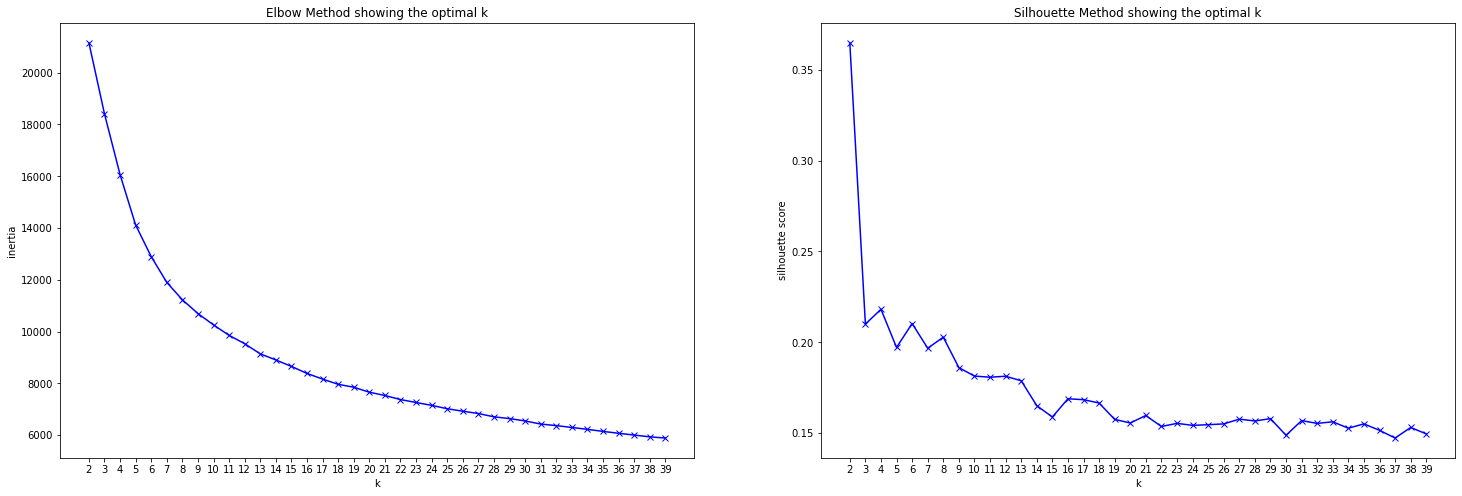

In [66]:
#plot how intertia values change with K 
fig, ax = plt.subplots(1,2,figsize=(25,8)) # ax is a np array with one row and two columns 
ax[0].plot(K, inertia, 'bx-') # "bx-" control the line stile
ax[0].set_xlabel('k') # x lable to ne K
ax[0].set_ylabel('inertia') # y label
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0)) # ticks at the K value, jumps on 1
ax[0].set_title('Elbow Method showing the optimal k') # set title

#second plot
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [67]:
#funtion to load
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: # we open the file to read "rb"
            return pickle.load(file) #load
    except FileNotFoundError: 
        print("File not found!") 

6 - concatenate num+ cluster and categorical full df

In [68]:
X_full_4feat_less = pd.concat([full_songs_1_cat, X],axis=1)
X_full_4feat_less

,artist_name,song_title,identifier,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,Harry Styles,As It Was,hot100,0.449,0.023,-24.423,0.0336,0.903000,0.018700,0.277,90.071
1,Jack Harlow,First Class,hot100,0.215,0.710,-7.285,0.0459,0.014300,0.000020,0.415,160.313
2,Lizzo,About Damn Time,hot100,0.709,0.357,-9.289,0.2140,0.478000,0.000294,0.544,75.494
3,Glass Animals,Heat Waves,hot100,0.797,0.616,-10.229,0.3750,0.762000,0.000293,0.451,103.071
4,Latto,Big Energy,hot100,0.708,0.673,-4.163,0.0585,0.499000,0.000233,0.311,136.969
...,...,...,...,...,...,...,...,...,...,...,...
3686,Rascal Flatts,Feels Like The First Time,not_hot,0.403,0.673,-5.116,0.0325,0.076500,0.000000,0.231,77.981
3687,Mighty Diamonds,Pass The Koutchie,not_hot,0.646,0.615,-12.868,0.0913,0.785000,0.002340,0.664,95.988
3688,Attila,Villain,not_hot,0.318,0.879,-2.625,0.0574,0.000298,0.030100,0.443,151.481
3689,Bohren & Der Club Of Gore,Constant Fear,not_hot,0.445,0.340,-7.942,0.0518,0.698000,0.000000,0.177,116.826


7 - place a new column with the clusters in the full concatenated df

In [69]:
kmeans_30 = load("models/kmeans_30.pickle")
kmeans_30

KMeans(n_clusters=30, verbose=1)

In [70]:
clusters = kmeans_30.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()#.sum() # Number of wines in each cluster

0      60
1     195
2      97
3     141
4     115
5      87
6     145
7     144
8      27
9     117
10    165
11    224
12    151
13    109
14     84
15    123
16    123
17     81
18     58
19     55
20    194
21    173
22    191
23    174
24    113
25    101
26     84
27     77
28    159
29    124
dtype: int64

In [71]:
X_full_4feat_less["cluster_k30"] = clusters
#X_full_4feat_less

In [72]:
X_full_4feat_less

,artist_name,song_title,identifier,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster_k30
0,Harry Styles,As It Was,hot100,0.449,0.023,-24.423,0.0336,0.903000,0.018700,0.277,90.071,0
1,Jack Harlow,First Class,hot100,0.215,0.710,-7.285,0.0459,0.014300,0.000020,0.415,160.313,15
2,Lizzo,About Damn Time,hot100,0.709,0.357,-9.289,0.2140,0.478000,0.000294,0.544,75.494,26
3,Glass Animals,Heat Waves,hot100,0.797,0.616,-10.229,0.3750,0.762000,0.000293,0.451,103.071,26
4,Latto,Big Energy,hot100,0.708,0.673,-4.163,0.0585,0.499000,0.000233,0.311,136.969,21
...,...,...,...,...,...,...,...,...,...,...,...,...
3686,Rascal Flatts,Feels Like The First Time,not_hot,0.403,0.673,-5.116,0.0325,0.076500,0.000000,0.231,77.981,4
3687,Mighty Diamonds,Pass The Koutchie,not_hot,0.646,0.615,-12.868,0.0913,0.785000,0.002340,0.664,95.988,9
3688,Attila,Villain,not_hot,0.318,0.879,-2.625,0.0574,0.000298,0.030100,0.443,151.481,15
3689,Bohren & Der Club Of Gore,Constant Fear,not_hot,0.445,0.340,-7.942,0.0518,0.698000,0.000000,0.177,116.826,12


In [74]:
X_full_4feat_less[X_full_4feat_less['cluster_k30'] ==15].sample()

,artist_name,song_title,identifier,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster_k30
106,Dounia,If U Wanna,not_hot,0.407,0.738,-3.985,0.0562,0.14,0.000047,0.367,199.663,15


THE END